K MEANS CLUSTERING ALGORITHM
by: SHASHI VALLABH MAKKAPATI
roll: 23EC30048

importing the necessary libraries

In [304]:
import math
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

We first load the image and convert black pixels to 0 and white pixels to 1
Finally, boolimg is a 64*64 array containing 0s and 1s
Count is the number of white pixels in the image

In [366]:
np.set_printoptions(threshold=np.inf) #just in case we want to view the entire arrays
img=Image.open(r"C:\Users\shash\Downloads\4.png")
imgarray=np.array(img)
boolimg=np.zeros((64,64),dtype=int)
count=0
for i in range(64):
    for j in range(64):
        if np.array_equal(imgarray[i, j], [0, 0, 0, 255]):boolimg[i,j]=0
        else: 
            boolimg[i,j]=1
            count+=1


user defined functions

In [367]:
def distance(p,q):
    return math.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2)

Error is encountered if one of the initial guesses maps to none of the pixels
To get rid of this case check0 function is defined
For a given centroid list, it checks if any of the centroids maps to 0 elements

In [368]:
def check0(centroids,k): #error is encountered if one of the initial guesses maps to none of the pixels
    append_indexes=[0]*k
    for i in range(64):
     for j in range(64):
        if(boolimg[i,j]):
         
         distances=[]
         for k in range(len(centroids)):
            distances.append(distance(np.array([i,j]),centroids[k,:]))
         
         crrspc=np.argmin(distances)
         
         
         
         append_indexes[crrspc]+=1
          #finally, append_indexes stores the number of elements corresponding to each centroid
    return 0 in append_indexes


main k clustering algorithm

In [369]:
def kclusters(k,boolimg,count):
 
 centroids=np.empty((k,2),dtype=int)
 white_pixel=np.argwhere(boolimg==1) #stores all the white pixels
 centroids=white_pixel[np.random.choice(len(white_pixel),size=k,replace=False)] #initial guess is k number of white pixels
 
 while (check0(centroids,k)):
         centroids=white_pixel[np.random.choice(len(white_pixel),size=k,replace=False)]
 #we will only come out of the loop if all centroids map to at least one element
 while True:
  newcentroids=np.empty((k,2),dtype=int)
  clusters=np.empty((k,count,2),dtype=int)
  append_indexes=[0]*k

  for i in range(64):
    for j in range(64):
        if(boolimg[i,j]):
         #storing distances of a given white pixel from every centroid
         distances=[]
         for p in range(len(centroids)):
            distances.append(distance(np.array([i,j]),centroids[p,:]))
         
         crrspc=np.argmin(distances)
         #the centroid nearest to the white pixel is calculated and added to the corresponding centroids' cluster
         
         clusters[crrspc,append_indexes[crrspc],:]=np.array([i,j])
         append_indexes[crrspc]+=1
 
  flag=check0(centroids,k)
  while (check0(centroids,k)):
    
       
         
         centroids=white_pixel[np.random.choice(len(white_pixel),size=k,replace=False)]
  if flag:
    continue
  #if one of the centroid still maps to 0 after/before calculating mean, we again start from a random centroid set
  for i in range(k):
    sumx=0
    sumy=0
    for j in range(append_indexes[i]):
        sumx=sumx+clusters[i,j,0]
        sumy=sumy+clusters[i,j,1]
    newcentroids[i:]=[sumx/append_indexes[i],sumy/append_indexes[i]]  
    #new centroid contains the centroid of each cluster
  #convergence condition : if the centroid doesnt change after an iteration 
  if(np.array_equal(newcentroids,centroids)):
    break
  centroids=newcentroids
 return newcentroids,clusters,append_indexes


how ever the k cluster algorithm is very sensitive to the inital random means and can give a few anamolous results
to clean this, we keep calling the same kclusters function until two consecutive calls give the same values

In [370]:
def k_cluster_cleaned(k,boolimg,count):
    while True:
     centres,clusters,append_indexes=kclusters(k,boolimg,count)
     centres2,clusters2,append_indexes2=kclusters(k,boolimg,count)
     if(np.array_equal(centres,centres2)):
      break
    return centres,clusters,append_indexes

following function helps us in elbow method where the function returns "within  cluster sum of square" for a given k

In [371]:
def sum_square_error(k,boolimg,count):
    newcentroids,clusters,append_indexes=kclusters(k,boolimg,count)
    sse=0
    for i in range(k):
        for j in range(append_indexes[i]):
            sse=sse+distance(newcentroids[i],clusters[i,j,:])**2
    return sse

User has to enter a suitable elbow point after the program prints the sse plot 

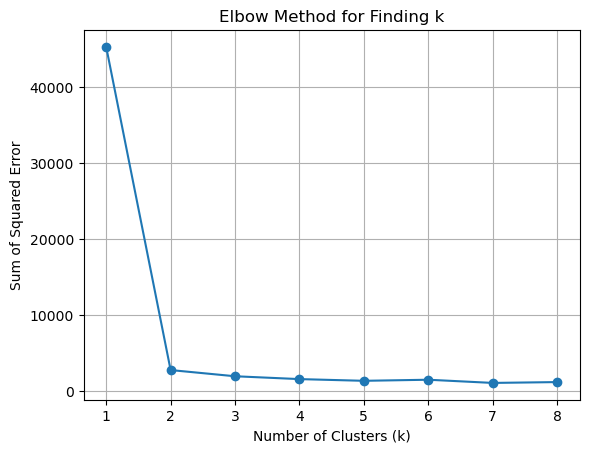

enter the elbow point2


In [372]:
#Now we identify the cities by calling the functions
sselist=[] #stores the within cluster squared distance sum for values of k from 1 to 8
for q in range(8):
     sselist.append(sum_square_error(q+1,boolimg,count))
    
x_axis=range(1,9)
plt.plot(x_axis,sselist, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method for Finding k')
plt.grid(True)
plt.show()
correct_k=int(input("enter the elbow point"))

city_centres,cities,lights=k_cluster_cleaned(correct_k,boolimg,count)

k=len(city_centres)

#we change the pixels of the original image to different colours for each cluster
for i in range(k):
    for j in range(lights[i]):
        
        imgarray[(cities[i,j])[0],(cities[i,j])[1]]=[255,255*(1+i)/(k+1),255*(1+i)/(k+1),255]

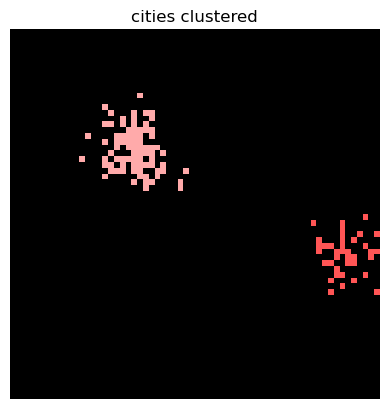

In [373]:
plt.imshow(imgarray)
plt.axis('off')
plt.title('cities clustered')
plt.show()

In [374]:
dist_between_cities=[]
for i in range(k):
    print('city ',i+1,' is ',city_centres[i])
for i in range(k):
    for j in range(i+1,k):
        dist_between_cities.append(distance(city_centres[i],city_centres[j]))
print_count=0
for i in range(k):
    for j in range(i+1,k):
        print("distance between city ",i+1," and city ",j+1," is ",dist_between_cities[print_count])
        print_count+=1

city  1  is  [38 57]
city  2  is  [20 21]
distance between city  1  and city  2  is  40.24922359499622
